# Exploratory Analysis 
-----

This notebook cotains:
- [Data Cleaning](#Data-Cleaning)
- [EDA](#EDA)
- [Time Series EDA](#Time-Series-EDA)
- [Feature Engineering](#Feature-Engineering)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# Importing our combined dataset
df = pd.read_csv('../data/NSRDB_data.csv', index_col='datetime', parse_dates=True)
print(df.shape)
df.head()

(87696, 22)


,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016,1,1,0,0,5.0,0,0,0,0,...,0,0,0,49.00,168.95,0.128,990,0.472,55.7,4.0
2016-01-01 00:30:00,2016,1,1,0,30,5.0,0,0,0,0,...,0,0,0,49.00,166.74,0.128,990,0.477,55.7,4.0
2016-01-01 01:00:00,2016,1,1,1,0,5.0,0,0,0,0,...,0,0,0,48.97,162.23,0.128,990,0.482,55.7,4.1
2016-01-01 01:30:00,2016,1,1,1,30,5.0,0,0,0,0,...,0,0,0,48.97,156.74,0.128,990,0.489,55.7,4.1
2016-01-01 02:00:00,2016,1,1,2,0,5.0,0,0,0,0,...,0,0,0,48.98,150.83,0.128,990,0.496,56.0,4.2


## Data Cleaning

In [3]:
# Checking for null values 
df.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
Fill Flag             0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Surface Albedo        0
Pressure              0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
dtype: int64

In [4]:
df.describe()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
count,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,...,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000
mean,2018.000000,6.521073,15.735085,11.500000,15.000000,18.502992,46.813435,354.210226,257.305464,1.689359,...,282.038759,4.552602,225.849469,58.737173,89.717523,0.135777,986.826001,1.578962,173.188175,1.990363
std,1.414995,3.449232,8.802441,6.922226,15.000086,6.524041,55.560772,390.439956,332.676406,2.639331,...,364.473386,17.746318,311.533045,22.989901,39.062080,0.006424,5.556412,0.773420,95.497189,1.282689
min,2016.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.190000,10.660000,0.120000,960.000000,0.176000,0.000000,0.000000
25%,2017.000000,4.000000,8.000000,5.750000,0.000000,13.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,40.040000,57.820000,0.130000,980.000000,1.061000,79.000000,1.000000
50%,2018.000000,7.000000,16.000000,11.500000,15.000000,17.900000,7.000000,34.000000,7.000000,0.000000,...,0.000000,0.000000,5.000000,57.790000,89.480000,0.135000,988.000000,1.443000,195.000000,1.700000
75%,2019.000000,10.000000,23.000000,17.250000,30.000000,23.000000,92.000000,795.000000,532.000000,3.000000,...,659.000000,0.000000,433.000000,78.250000,121.900000,0.140000,990.000000,1.927000,248.000000,2.800000
max,2020.000000,12.000000,31.000000,23.000000,30.000000,42.500000,410.000000,1010.000000,1075.000000,9.000000,...,1010.000000,100.000000,1070.000000,100.000000,169.250000,0.150000,1003.000000,6.646000,360.000000,10.600000


The dataset appears to be relatively clean with no concernable errors

## EDA

Which features are most predictive for present-day GHI?

In [5]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [6]:
features = ['Wind Speed', 'Wind Direction', 'Dew Point', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Temperature', 'Solar Zenith Angle', 'GHI']

<Axes: >

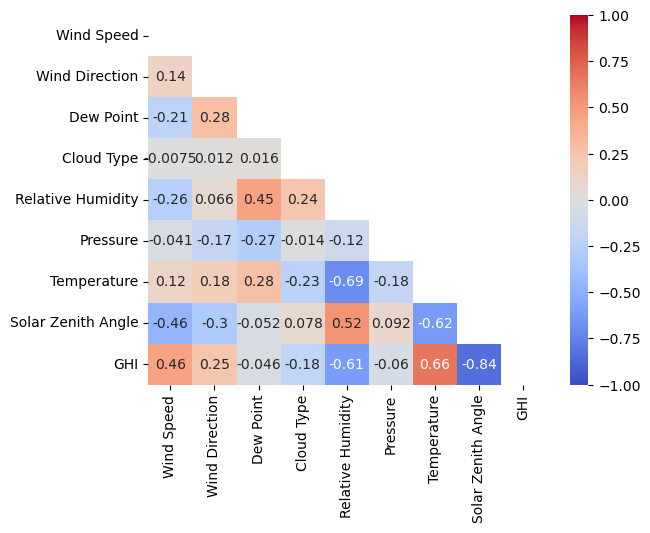

In [7]:
corr = df[features].corr()
mask = np.zeros(corr.shape)
mask[np.triu_indices_from(corr)] = True
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask)

Next, I would like to look at how clouds affect the GHI. Clouds can probably be pretty important, because 

N/A': -15,
'Clear': 0, 'Probably Clear': 1, 'Fog': 2, 'Water': 3, 'Super-Cooled Water': 4, 'Mixed': 5, 'Opaque
Ice': 6, 'Cirrus': 7, 'Overlapping': 8, 'Overshooting': 9, 'Unknown': 10, 'Dust': 11, 'Smoke': 12.

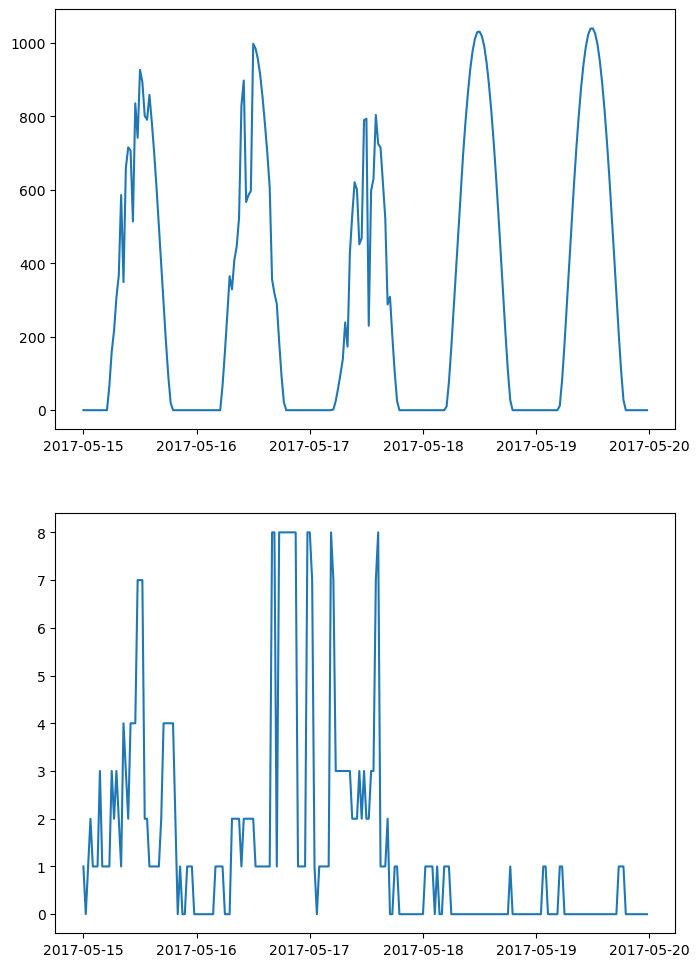

In [8]:
GHI = df['GHI']

i = 500
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))
ax1.plot(GHI[i*48:(i+5)*48])
ax2.plot(df['Cloud Type'][i*48:(i+5)*48])

plt.show()

How does the average GHI evolve throughout the full 5 years of the dataset?

In [9]:
def calc_daily_mean(input_arr):
    ml = []
    for i in range(0, len(input_arr), 48):
        ml.append(np.mean(input_arr[i:i+48]))
    return np.array(ml)

In [11]:
mean_GHI = calc_daily_mean(df['GHI'])

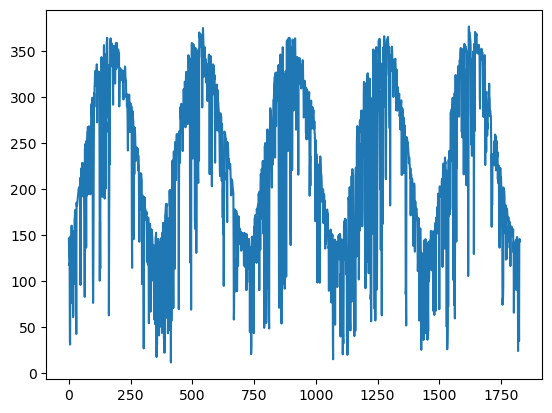

In [12]:
plt.plot(mean_GHI)
plt.show()

## Time Series EDA

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

From the plotting of the GHI we can see that there is yearly seasonality to to the values but we will also plot the year seasonal decomposition to investigate month seasonality.

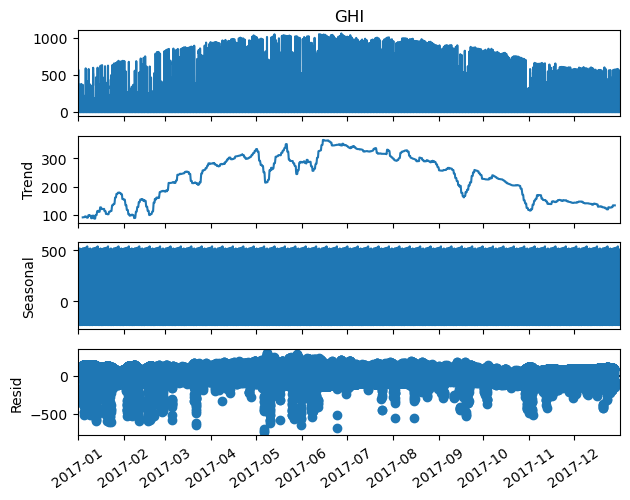

In [14]:
df_2017 = df.loc['2017']
decomp = seasonal_decompose(df_2017['GHI'], period = 48*7)

# Plot the decomposed time series.
decomp.plot();
plt.xticks(rotation=35);

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

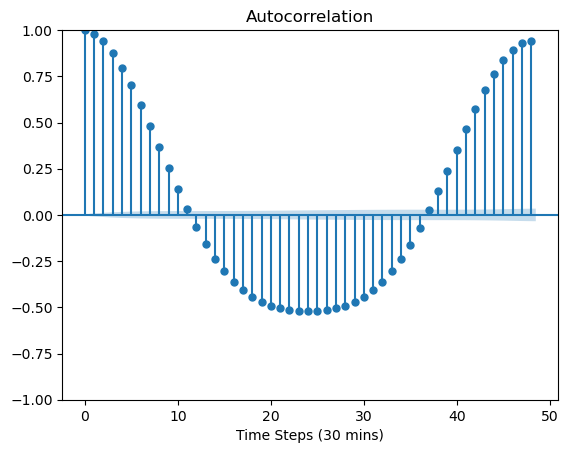

In [16]:
plot_acf(df['GHI'], lags=48)
plt.xlabel('Time Steps (30 mins)');

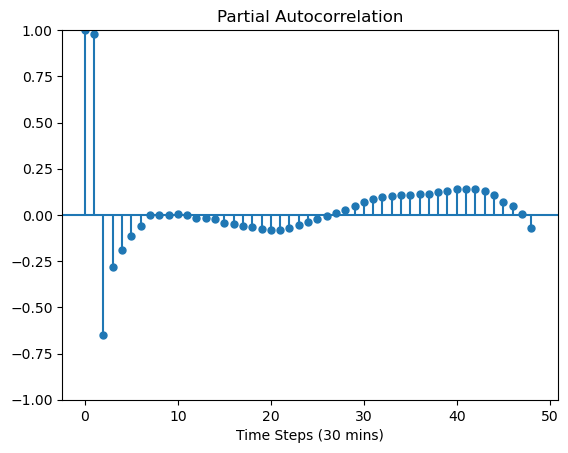

In [17]:
plot_pacf(df['GHI'], lags=48, method='ywm');
plt.xlabel('Time Steps (30 mins)');

From the Autocorrelation and Partial Autocorrelation, we can see that there is strong correlation for GHI between all hours of the day, especially from the 2 most recent hours. 

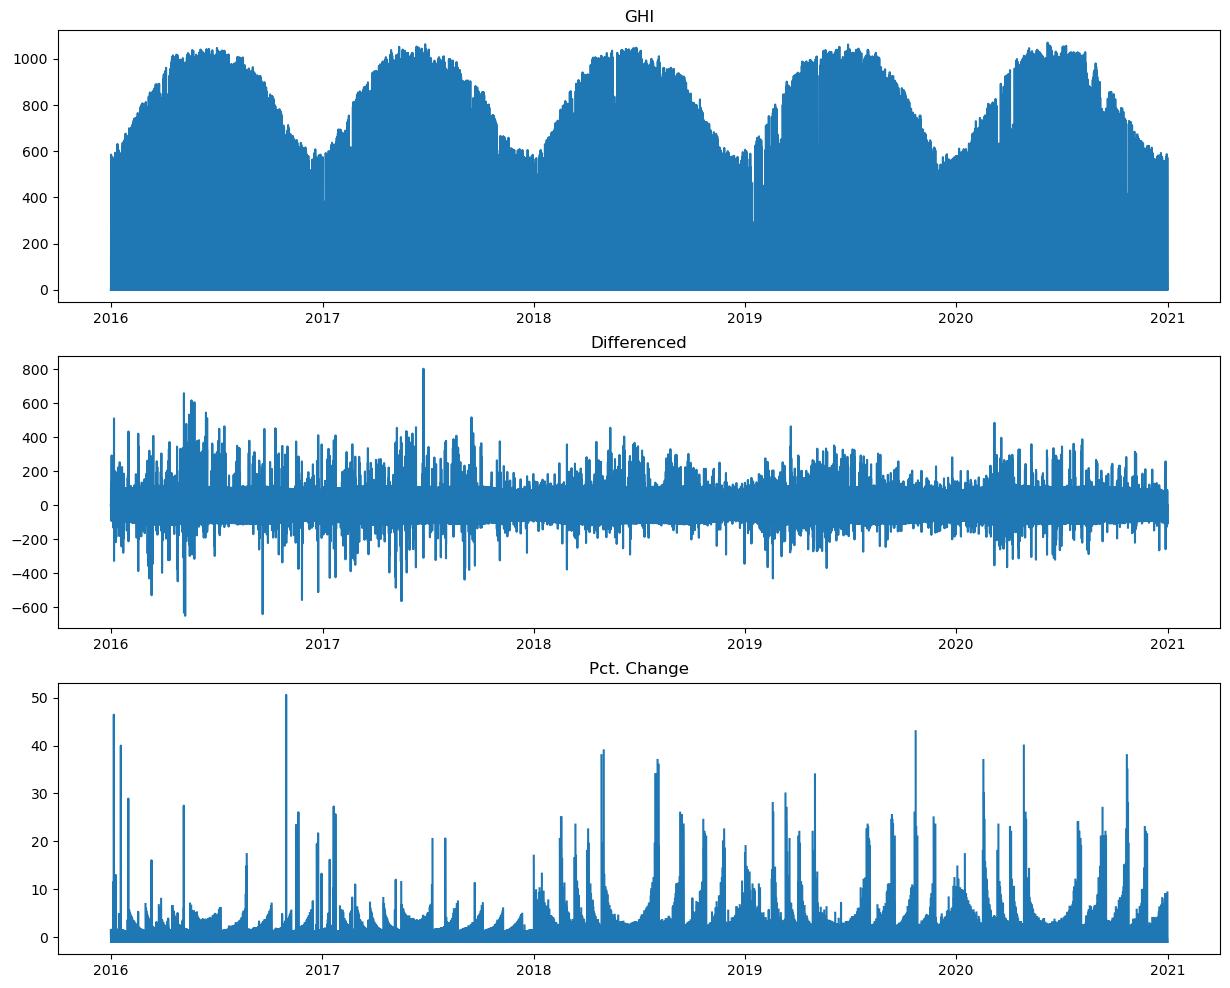

In [18]:
# Changes in data on entier dataset
fig, axes = plt.subplots(3, 1, figsize=(15,12))

axes[0].plot(df['GHI'])
axes[1].plot(df.diff()['GHI'])
axes[2].plot(df.pct_change()['GHI'])

axes[0].title.set_text('GHI')
axes[1].title.set_text('Differenced')
axes[2].title.set_text('Pct. Change');

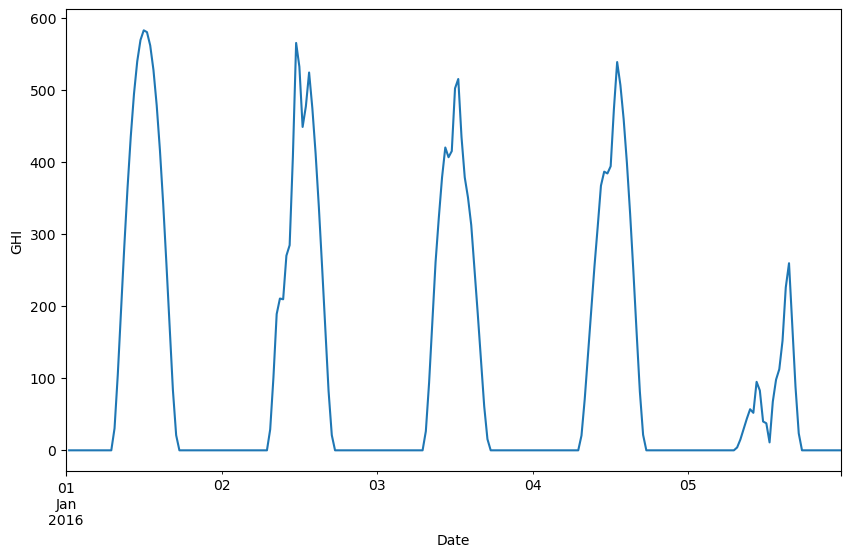

In [19]:
# Hourly rolling average of GHI across 5 days
df_day = df.iloc[0:240, :].copy()
df_day['moving_avg'] = df_day['GHI'].rolling(window=2).mean()
df_day['moving_avg'].plot(figsize=(10,6));
plt.xlabel('Date')
plt.ylabel('GHI');

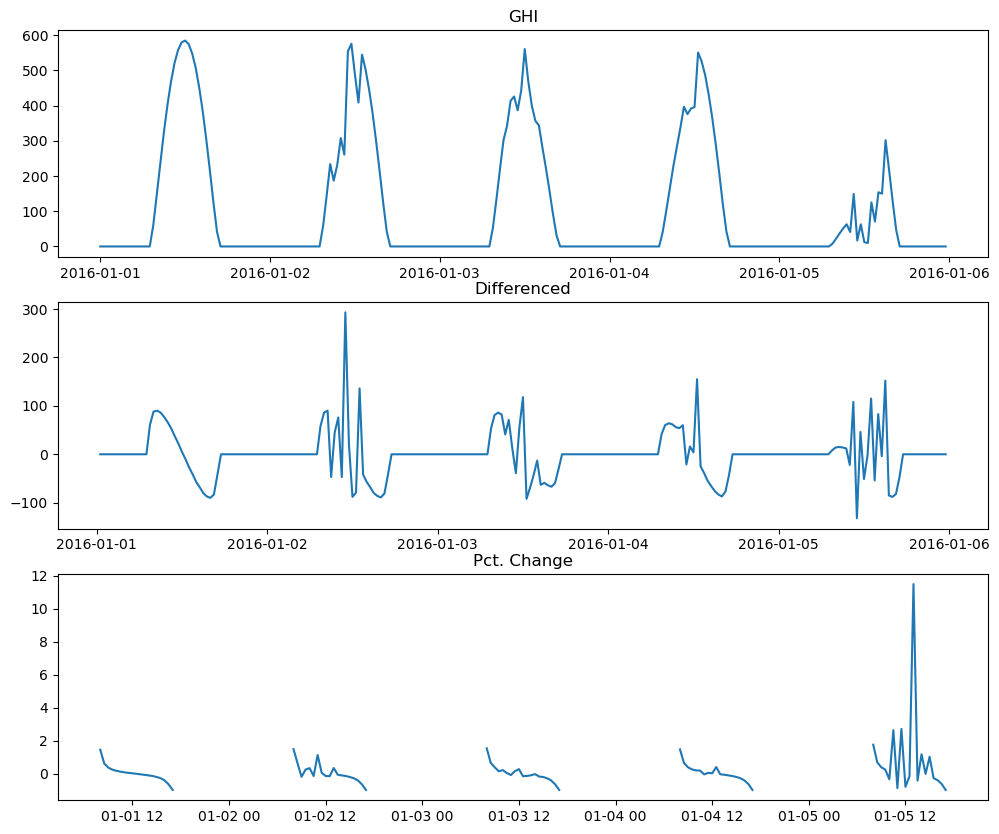

In [20]:
# Differences in GHI in 5 day span
fig, axes = plt.subplots(3, 1, figsize=(12,10))

axes[0].plot(df_day['GHI'])
axes[1].plot(df_day.diff()['GHI'])
axes[2].plot(df_day.pct_change()['GHI'])

axes[0].title.set_text('GHI')
axes[1].title.set_text('Differenced')
axes[2].title.set_text('Pct. Change');

The use of *pct_change()* would result in errors as seen from the 5 day span

## Feature Engineering

The timestep difference of the features and target can be used for smoother modeling so we will include them in the dataframe

In [21]:
df_difference = df.diff()

df = df.join(df_difference, how='left', rsuffix=' Difference')

#Would have to drop first time step to remove NaNs
df.dropna()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI Difference,Fill Flag Difference,GHI Difference,Relative Humidity Difference,Solar Zenith Angle Difference,Surface Albedo Difference,Pressure Difference,Precipitable Water Difference,Wind Direction Difference,Wind Speed Difference
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:30:00,2016,1,1,0,30,5.0,0,0,0,0,...,0.0,0.0,0.0,0.00,-2.21,0.0,0.0,0.005,0.0,0.0
2016-01-01 01:00:00,2016,1,1,1,0,5.0,0,0,0,0,...,0.0,0.0,0.0,-0.03,-4.51,0.0,0.0,0.005,0.0,0.1
2016-01-01 01:30:00,2016,1,1,1,30,5.0,0,0,0,0,...,0.0,0.0,0.0,0.00,-5.49,0.0,0.0,0.007,0.0,0.0
2016-01-01 02:00:00,2016,1,1,2,0,5.0,0,0,0,0,...,0.0,0.0,0.0,0.01,-5.91,0.0,0.0,0.007,0.3,0.1
2016-01-01 02:30:00,2016,1,1,2,30,5.0,0,0,0,0,...,0.0,0.0,0.0,-0.01,-6.10,0.0,0.0,0.007,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:30:00,2020,12,31,21,30,9.8,0,0,0,0,...,0.0,0.0,0.0,0.89,6.17,0.0,0.0,0.000,4.0,0.2
2020-12-31 22:00:00,2020,12,31,22,0,9.6,0,0,0,0,...,0.0,0.0,0.0,-2.57,6.06,0.0,0.0,0.000,4.0,0.1
2020-12-31 22:30:00,2020,12,31,22,30,9.4,0,0,0,0,...,0.0,0.0,0.0,0.80,5.84,0.0,-1.0,0.000,4.0,0.2


From the data analysis, we can see that there is seasonality on an yearly and daily basis for our target variable of GHI. We will introduce two features to mimic this seasonality that can be used in modeling. 

In [22]:
# Use sine function to mimic daily and seasonal trends
df['Day Seasonality'] = [np.abs(np.sin(x*np.pi/48)) for x in [*range(df.shape[0])]]
df['Year Seasonality'] = [np.abs(np.sin(x*np.pi/(48*365))) for x in [*range(df.shape[0])]]

In [23]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,GHI Difference,Relative Humidity Difference,Solar Zenith Angle Difference,Surface Albedo Difference,Pressure Difference,Precipitable Water Difference,Wind Direction Difference,Wind Speed Difference,Day Seasonality,Year Seasonality
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016,1,1,0,0,5.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2016-01-01 00:30:00,2016,1,1,0,30,5.0,0,0,0,0,...,0.0,0.00,-2.21,0.0,0.0,0.005,0.0,0.0,0.065403,0.000179
2016-01-01 01:00:00,2016,1,1,1,0,5.0,0,0,0,0,...,0.0,-0.03,-4.51,0.0,0.0,0.005,0.0,0.1,0.130526,0.000359
2016-01-01 01:30:00,2016,1,1,1,30,5.0,0,0,0,0,...,0.0,0.00,-5.49,0.0,0.0,0.007,0.0,0.0,0.195090,0.000538
2016-01-01 02:00:00,2016,1,1,2,0,5.0,0,0,0,0,...,0.0,0.01,-5.91,0.0,0.0,0.007,0.3,0.1,0.258819,0.000717
